<div style="text-align: center;"></div>

# Chapter 6 Exercises


## Exercise 1
![Exercise 1-1](Images/Exercise1-1.png)
![Exercise 1-2](Images/Exercise1-2.png)


### Sub Exercise a

The marginal distribution is found using:
$$p(x)=\sum_{i=1}^{3}{p(x=x, y=y_{i})}$$
$$p(y)=\sum_{i=1}^{5}{p(x=x_{i}, y=y)}$$
So for x we have:
$$p(x_{1})=\sum_{i=1}^{3}{p(x=x{1}, y=y_{i})}=0.01+0.05+0.1 =0.16$$
$$p(x_{2})=\sum_{i=1}^{3}{p(x=x{2}, y=y_{i})}=0.02+0.1+0.05 =0.17$$
$$p(x_{3})=\sum_{i=1}^{3}{p(x=x{3}, y=y_{i})}=0.03+0.05+0.03=0.11$$
$$p(x_{4})=\sum_{i=1}^{3}{p(x=x{4}, y=y_{i})}=0.1+0.07+0.05 =0.22$$
$$p(x_{5})=\sum_{i=1}^{3}{p(x=x{5}, y=y_{i})}=0.1+0.2+0.04  =0.34$$
And for y we have:
$$p(y_{1})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{1})}=0.01+0.02+0.03+0.1+0.1=0.26$$
$$p(y_{2})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{2})}=0.05+0.1+0.05+0.07+0.2=0.47$$
$$p(y_{3})=\sum_{i=1}^{5}{p(x=x_{i}, y=y_{3})}=0.1+0.05+0.03+0.05+0.04=0.27$$


### Sub Exercise b

For conditional probability we have:
$$p(X=x|Y=y_{i})=\frac{P(X=x, Y=y_{i})}{\sum_{j=1}^{3}{P(X=x, Y=y_{j})}})$$
$$p(Y=y|X=x_{i})=\frac{P(X=x_{i}, Y=y)}{\sum_{j=1}^{5}{P(X=x_{j}, Y=y)}})$$
This gives for $p(x|Y=y_{1})$:

| 0.039 | 0.077 | 0.115 | 0.385 | 0.385 |
| ----- | ----- | ----- | ----- | ----- |
| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $x_5$ |

And for $p(y|X=x_{3})$:

| 0.273 | 0.455 | 0.273 |
| ----- | ----- | ----- |
| $y_1$ | $y_2$ | $y_3$ |

## Exercise 2
![Exercise 2](Images/Exercise2.png)

### Sub Exercise a
The marginal distribution of a continuous random variable is computed as:
$$p(x_1)=\int_{R_{x_2}}{p(x_1,x_2)dx_2}=\int_{R_{x_2}}{0.4\mathcal{N}\left(\begin{bmatrix}10\\2 \end{bmatrix}, \begin{bmatrix}1&0\\0&1\end{bmatrix}\right)+
                                                       0.6\mathcal{N}\left(\begin{bmatrix}0\\0 \end{bmatrix}, \begin{bmatrix}8.4&2.0\\2.0&1.7\end{bmatrix}\right)dx_2}$$

$$p(x_1)=\int_{R_{x_2}}{0.4\mathcal{N}\left(\begin{bmatrix}10\\2 \end{bmatrix}, \begin{bmatrix}1&0\\0&1\end{bmatrix}\right)dx_2} +
         \int_{R_{x_2}}{0.6\mathcal{N}\left(\begin{bmatrix}0\\0 \end{bmatrix}, \begin{bmatrix}8.4&2.0\\2.0&1.7\end{bmatrix}\right)dx_2}$$

$$p(x_1)=0.4\mathcal{N}(10,1)+0.6\mathcal{N}(0,\sqrt{8.4})$$
$$p(x_2)=0.4\mathcal{N}(2,1)+0.6\mathcal{N}(0,\sqrt{1.7})$$

### Sub Exercise b
The mean is computed as:
$$E[x_1]=\int_{-\infty}^{\infty}{x_1p(x_1)dx_1}=\int_{-\infty}^{\infty}{x_1\left(0.4\mathcal{N}(10,1)+0.6\mathcal{N}(0,\sqrt{8.4})\right)dx_1}$$
$$E[x_1]=0.4\int_{-\infty}^{\infty}{x_1\mathcal{N}(10,1)dx_1}+0.6\int_{-\infty}^{\infty}{x_1\mathcal{N}(0,\sqrt{8.4})dx_1}=0.4\cdot 10+0.6 \cdot 0=4$$
Similarly:
$$E[x_2]=0.4 \cdot 2 +0.6 \cdot 0=0.8$$
The mode is the maximum value in the function. This can be found by differentiating and setting that differential equal to 0 to find the local maximum:
$$\frac{d(p(x_1))}{d(x_1)}=-0.4\frac{x-10}{\sqrt{2\pi}}\cdot e^{-\frac{(x-10)^2}{2}}-0.6\frac{x}{\sqrt{2\pi\cdot 8.4^3}}\cdot e^{-\frac{x^2}{2\cdot 8.4}}=0$$
$$\frac{d(p(x_1))}{d(x_1)}=0.4(x-10)\cdot e^{-\frac{(x-10)^2}{2}}+0.6\frac{x}{\sqrt{8.4^3}}\cdot e^{-\frac{x^2}{2\cdot 8.4}}=0$$
$$\frac{d(p(x_1))}{d(x_1)}=\left(0.4e^{-\frac{(x-10)^2}{2}}+\frac{0.6}{\sqrt{8.4^3}}e^{-\frac{x^2}{2\cdot 8.4}}\right)x-4e^{-\frac{(x-10)^2}{2}}=0$$
This looks hopeless. Might as well program my own gradient ascent:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import scipy.stats as stats

In [9]:

def ascent1(stepSize, epsilon, startVal = 10):
    function = lambda x : 0.4*(1/np.sqrt(2*np.pi))*np.exp(-((x-10)**2)/(2))+0.6*(1/np.sqrt(2*np.pi*8.4))*np.exp(-(x**2)/(2*8.4))
    derivative = lambda x : -0.4*((x-10)/np.sqrt(2*np.pi))*np.exp(-((x-10)**2)/(2))-0.6*(x/np.sqrt(2*np.pi*8.4**3))*np.exp(-(x**2)/(2*8.4))
    lastVal = 0
    xVal = startVal
    currentVal = function(xVal)
    while np.abs(currentVal-lastVal)>epsilon:
        lastVal = currentVal
        xVal += stepSize*derivative(xVal)
        currentVal = function(xVal)
    return (xVal, currentVal)

def ascent2(stepSize, epsilon, startVal = 10):
    function = lambda x : 0.4*(1/np.sqrt(2*np.pi))*np.exp(-((x-2)**2)/(2))+0.6*(1/np.sqrt(2*np.pi*1.7))*np.exp(-(x**2)/(2*1.7))
    derivative = lambda x : -0.4*((x-2)/np.sqrt(2*np.pi))*np.exp(-((x-2)**2)/(2))-0.6*(x/np.sqrt(2*np.pi*1.7**3))*np.exp(-(x**2)/(2*1.7))
    lastVal = 0
    xVal = startVal
    currentVal = function(xVal)
    while np.abs(currentVal-lastVal)>epsilon:
        lastVal = currentVal
        xVal += stepSize*derivative(xVal)
        currentVal = function(xVal)
    return (xVal, currentVal)

res1 = ascent1(0.1, 0.0000001, 7)
print(res1)
res2 = ascent2(0.1, 0.0000001, 0)
print(res2)



(9.99226666497335, 0.15978882719425405)
(1.315977056746852, 0.23660357908452534)


This shows that the mode of $p(x_1)$ is 10 and the mode of $p(x_2)$ is 1.316.

Lastly the median is the value that satisfies:
$$P(X<x)=\int_{-\infty}^{x}{p(x)dx}=0.5$$
For this Imma just use a pre made normal distribution and then use the inverse CDF to find the value:

2.792792792792792 0.4994268093506012
0.8708708708708706 0.5005147050883632


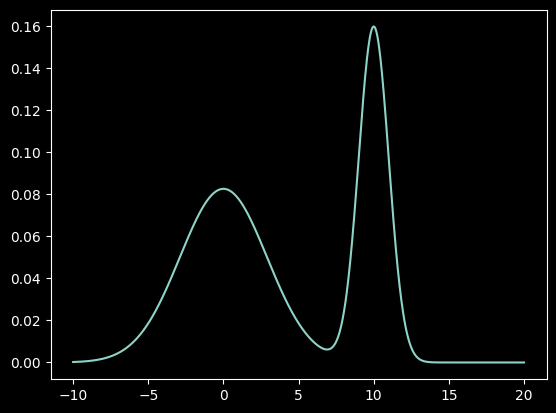

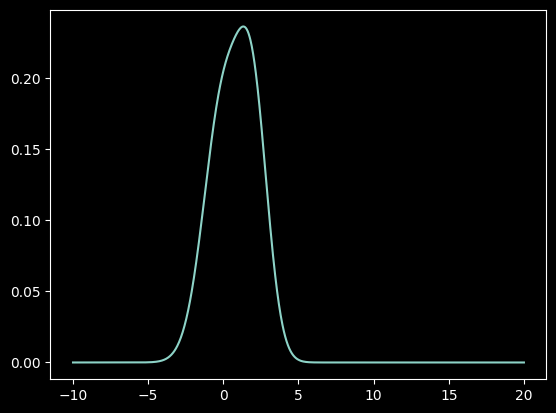

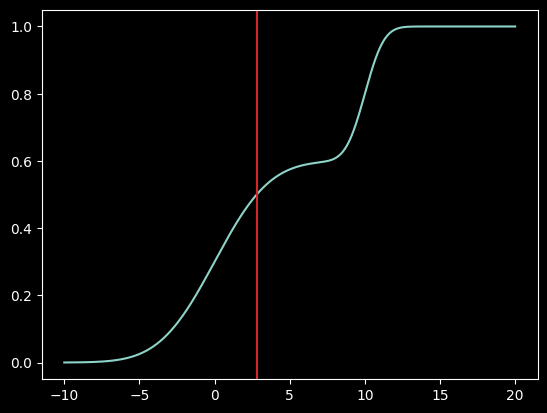

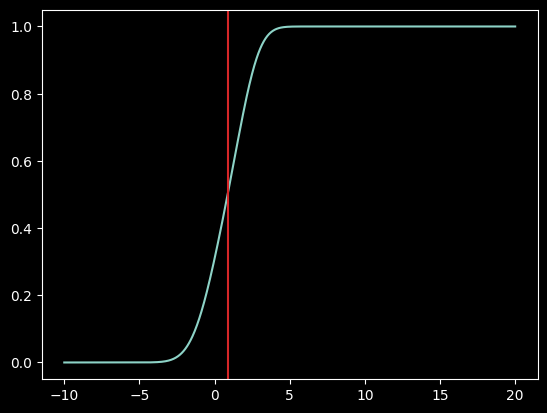

In [10]:
RNG = np.random.default_rng(123)
#normal1 = RNG.normal(10, 1, 1000)
#normal2 = RNG.normal(0, np.sqrt(8.4), 1000)
x = np.linspace(-10,20, 1000)
#x1 = 0.4*normal1+0.6*normal2
y1 = 0.4*stats.norm(10, 1).pdf(x) + 0.6*stats.norm(0, np.sqrt(8.4)).pdf(x)
Fig1, ax1 = plt.subplots()
ax1.plot(x, y1)
#Fig1.show()
#normal3 = RNG.normal(2, 1, 1000)
#normal4 = RNG.normal(0, np.sqrt(1.7), 1000)
#x2 = 0.4*normal3+0.6*normal4
#x2 = np.linspace(-10,20, 1000)
y2 = 0.4*stats.norm(2, 1).pdf(x) + 0.6*stats.norm(0, np.sqrt(1.7)).pdf(x)
Fig2, ax2 = plt.subplots()
ax2.plot(x, y2)
#Fig2.show()
y3 = 0.4*stats.norm(10, 1).cdf(x) + 0.6*stats.norm(0, np.sqrt(8.4)).cdf(x)
argmin_y3 = np.argmin(np.abs(y3-0.5))
Fig3, ax3 = plt.subplots()
ax3.plot(x, y3)
ax3.axvline(x[argmin_y3], color="tab:red")
print(x[argmin_y3], y3[argmin_y3])

y4 = 0.4*stats.norm(2, 1).cdf(x) + 0.6*stats.norm(0, np.sqrt(1.7)).cdf(x)
argmin_y4 = np.argmin(np.abs(y4-0.5))
Fig4, ax4 = plt.subplots()
ax4.plot(x, y4)
ax4.axvline(x[argmin_y4], color="tab:red")
print(x[argmin_y4], y4[argmin_y4])

From this we can see that the median for $p(x_1)$ is 2.79, and the median for $p(x_2)$ is 0.89.

### Sub Exercise c
Just like with the mean of the marginal distribution, the mean of the join distribution is the weighted sum of the mean from the two normal distributions:
$$E[x_1,x_2]=0.4\begin{bmatrix}10\\2\end{bmatrix}+0.6\begin{bmatrix}0\\0\end{bmatrix}=\begin{bmatrix}4\\0.8\end{bmatrix}$$
The mode would be where the mode of the two marginal distributions are:
$$mode=\begin{bmatrix}10\\1.316\end{bmatrix}$$

## Exercise 3
![Exercise 3](Images/Exercise3.png)

The conjugate prior to a Bernoulli likelihood is a Beta distribution. This means that we have to use the prior $p(\mu|\alpha,\beta)\sim Beta(\alpha+x,\beta+(1-x))$ This leads to:
$$p(\mu|x)=\frac{p(x|\mu)p(\mu|\alpha,\beta)}{p(x)}$$

This means that we have to use the prior $p(\mu) \sim Beta(h+\alpha,N-h+\beta)$ where h is the number of sucessful executions in $x_1,\dots , x_N$ and N is the number of code executions. This leads to:
$p(\mu|x_1,\dots ,x_N)=\frac{p(x|\mu)}{}$

These are the previous attempts. Just ignore them.

Since $p(x|\mu)$ is a Bernoulli distribution, then $p(x_1,\dots,x_N|\mu)$ is a Binomial distribution meaning:
$$p(x_1,\dots,x_N|\mu)=p(s|\mu)=\begin{pmatrix}N\\ s\end{pmatrix}\mu^s(1-\mu)^{N-s}$$
Where s is the number of successful runs out of N. By using the Beta distribution $p(\mu) \sim Beta(\alpha,\beta)$, which is conjugate to a Binomial likelihood we get:
$$p(\mu|x_1,\dots,x_N)=\frac{p(s|\mu)p(\mu)}{p(s)}=\frac{p(s|\mu)p(\mu)}{\int_{0}^{1}{p(s|\mu=y)p(\mu=y)dy}}=
\frac{\left(\begin{pmatrix}N\\ s\end{pmatrix}\mu^s(1-\mu)^{N-s}\right)(\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\mu^{\alpha-1}(1-\mu)^{\beta-1})}{\begin{pmatrix}N\\ s\end{pmatrix}\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\int_{0}^{1}{(y^s(1-y)^{N-s})(y^{\alpha-1}(1-y)^{\beta-1})dy}}$$

$$p(\mu|x_1,\dots,x_N)=\frac{\mu^s(1-\mu)^{N-s}\mu^{\alpha-1}(1-\mu)^{\beta-1}}{\int_{0}^{1}{(y^s(1-y)^{N-s})(y^{\alpha-1}(1-y)^{\beta-1})dy}}=
  \frac{\mu^{s+\alpha-1}(1-\mu)^{N-s+\beta-1}}{\int_{0}^{1}{y^{s+\alpha-1}(1-y)^{N-s+\beta-1}dy}}=C\mu^{s+\alpha-1}(1-\mu)^{N-s+\beta-1}$$

The last part is the Beta distribution $Beta(s+\alpha,N-s+\beta)$, where $C=\frac{\Gamma(s+\alpha+N-s+\beta)}{\Gamma(s+\alpha)\Gamma(N-s+\beta)}=\frac{\Gamma(\alpha+N+\beta)}{\Gamma(s+\alpha)\Gamma(N-s+\beta)}$ from the fact that it is a Beta distribution. Leading to:
$$p(\mu|x_1,\dots,x_N)=\frac{\Gamma(\alpha+N+\beta)}{\Gamma(s+\alpha)\Gamma(N-s+\beta)}\mu^{s+\alpha-1}(1-\mu)^{N-s+\beta-1}$$

## Exercise 4
![Exercise 4](Images/Exercise4.png)

$P(M)$ is probabilty of getting mango, $P(A)$ is probability of getting apple, and P(B_1) and P(B_2) are probabilities of picking from bag 1 and 2 respectively:
$$P(B_2|M)=\frac{P(M|B_2)P(B_2)}{P(M)}=\frac{P(M|B_2)P(B_2)}{P(M|B_1)P(B_1)+P(M|B_2)P(B_2)}=
           \frac{\frac{4}{8}\cdot0.4}{\frac{4}{6}\cdot0.6+\frac{4}{8}\cdot0.4}=\frac{0.2}{0.4+0.2}=\frac{1}{3}$$

## Exercise 5
![Exercise 5-1](Images/Exercise5-1.png)
![Exercise 5-2](Images/Exercise5-2.png)

### Sub Exercise a
It is possible to dissect the joint distribution using the product rule:
$$p(\mathbf{x_0,x_1,\dots,x_T})=p(\mathbf{x_T|x_0,x_1\dots,x_{T-1}})p(\mathbf{x_0,x_1\dots,x_{T-1}})=$$
$$=p(\mathbf{x_T|x_0,x_1\dots,x_{T-1}})p(\mathbf{x_{T-1}|x_0,x_1\dots,x_{T-2}})\cdots p(\mathbf{x_1|x_0})p(\mathbf{x_0})$$

### Sub Exercise b
For first computation:
$$p(\mathbf{x_{t-1}|y_1,\dots,y_t})$$

## Exercise 6
![Exercise 6](Images/Exercise6.png)

We have to prove the following:
$$\mathbb{V}_X[x]=\mathbb{E}_X[x^2]-(\mathbb{E}_X[x])^2$$
We start from:
$$\mathbb{V}_X[x]=\mathbb{E}_X[(x-\mu)^2]=\mathbb{E}_X[x^2-2x\mu+\mu^2]=\mathbb{E}_X[x^2]-\mathbb{E}_X[2x\mu]+\mathbb{E}_X[\mu^2]=\mathbb{E}_X[x^2]-2\mu\mathbb{E}_X[x]+\mu^2$$
$$\mathbb{V}_X[x]=\mathbb{E}_X[x^2]-2\mathbb{E}_X[x]\mathbb{E}_X[x]+(\mathbb{E}_X[x])^2=\mathbb{E}_X[x^2]-2(\mathbb{E}_X[x])^2+(\mathbb{E}_X[x])^2=\mathbb{E}_X[x^2]-(\mathbb{E}_X[x])^2$$

## Exercise 7
![Exercise 7](Images/Exercise7.png)

We have to prove the following:
$$\frac{1}{N^2}\sum_{i,j=1}^{N}{(x_i-x_j)^2}=2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\left(\frac{1}{N}\sum_{i=1}^{N}{x_i}\right)^2\right]$$
we start from:
$$\frac{1}{N^2}\sum_{i,j=1}^{N}{(x_i-x_j)^2}=\frac{1}{N^2}\sum_{i,j=1}^{N}{x_i^2-2x_ix_j+x_j^2}=
  \frac{1}{N^2}\left(\sum_{i=1}^{N}\sum_{j=1}^{N}{x_i^2}-\sum_{i,j=1}^{N}{2x_ix_j}+\sum_{j=1}^{N}\sum_{i=1}^{N}{x_j^2}\right)$$
Since the terms in the sum with j can be reordered to be in the same order as the terms in the sum with i we have:
$$\frac{1}{N^2}\left(N\sum_{i=1}^{N}{x_i^2}-\sum_{i,j=1}^{N}{2x_ix_j}+N\sum_{j=1}^{N}{x_j^2}\right)=\frac{1}{N^2}\left(N\sum_{i=1}^{N}{x_i^2}-\sum_{i,j=1}^{N}{2x_ix_j}+N\sum_{i=1}^{N}{x_i^2}\right)=\frac{1}{N^2}\left(2N\sum_{i=1}^{N}{x_i^2}-2\sum_{i,j=1}^{N}{x_ix_j}\right)$$
$$\frac{2}{N^2}\left(N\sum_{i=1}^{N}{x_i^2}-\sum_{i,j=1}^{N}{x_ix_j}\right)=2\left(\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\frac{1}{N^2}\sum_{i,j=1}^{N}{x_ix_j}\right)$$
Let us try approaching from the right hand side:
$$2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\left(\frac{1}{N}\sum_{i=1}^{N}{x_i}\right)^2\right]=2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\frac{1}{N^2}(x_1+x_2+\dots x_N)(x_1+x_2+\dots x_N)\right]=
  2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\frac{1}{N^2}(x_1^2+x_1x_2+\dots x_2x_1+x_2^2+\dots x_{N-1}x_N+x_N^2)\right]$$
$$2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\left(\frac{1}{N}\sum_{i=1}^{N}{x_i}\right)^2\right]=2\left[\frac{1}{N}\sum_{i=1}^{N}{x_i^2}-\frac{1}{N^2}\sum_{i,j=1}^{N}{x_ix_j}\right]=LHS$$

## Exercise 8
![Exercise 8](Images/Exercise8.png)

The natural parameter form of the exponential family is:
$$p(\mathbf{x|\theta})=h(\mathbf{x})e^{\langle\mathbf{\theta,\phi(x)}\rangle-A(\mathbf{\theta})}$$
The Bernoulli distribution is of form:
$$p(x|\theta)=\theta^x(1-\theta)^{1-x},\: x\in\{0,1\}$$
Working we that we have:
$$p(x|\theta)=\theta^x(1-\theta)^{1-x}=exp(ln(\theta^x(1-\theta)^{1-x}))=exp(xln(\theta)+(1-x)ln(1-\theta))=
  exp\left(\begin{bmatrix}ln(\theta) & ln(1-\theta)\end{bmatrix}\begin{bmatrix}x\\1-x\end{bmatrix}\right)$$

## Exercise 9
![Exercise 9](Images/Exercise9.png)

The natural parameter form of the exponential family is:
$$p(\mathbf{x|\theta})=h(\mathbf{x})e^{\langle\mathbf{\theta,\phi(x)}\rangle-A(\mathbf{\theta})}$$
The binomial distribution is of form:
$$p(x|N,\mu)=\begin{pmatrix}N\\ x\end{pmatrix}\mu^x(1-\mu)^{N-x}, \: x\in\{1,2,\dots,N\}$$
Since it has similar form to the Bernoulli distribution we get:
$$p(x|N,\mu)=\begin{pmatrix}N\\ x\end{pmatrix}exp\left(\begin{bmatrix}ln(\mu) & ln(1-\mu)\end{bmatrix}\begin{bmatrix}x\\ N-x\end{bmatrix}\right)$$

The Beta distribution is of form:
$$p(x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$$
Since it has similar form to the Bernoulli distribution we get:
$$p(x|\alpha,\beta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)}exp\left(\begin{bmatrix}\alpha-1 & \beta-1\end{bmatrix}\begin{bmatrix}ln(x)\\ ln(1-x)\end{bmatrix}\right)$$

The product of the two distributions after being expressed in natural parameter form becomes:
$$p(x|\alpha,\beta)p(x|N,\mu)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)}\begin{pmatrix}N\\ x\end{pmatrix}exp\left(\begin{bmatrix}\alpha-1 & \beta-1\end{bmatrix}\begin{bmatrix}ln(x)\\ ln(1-x)\end{bmatrix}+\begin{bmatrix}ln(\mu) & ln(1-\mu)\end{bmatrix}\begin{bmatrix}x\\ N-x\end{bmatrix}\right)$$
$$p(x|\alpha,\beta)p(x|N,\mu)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)+\Gamma(\beta)}\begin{pmatrix}N\\ x\end{pmatrix}exp\left(\begin{bmatrix}\alpha-1 & \beta-1 & ln(\mu) & ln(1-\mu)\end{bmatrix}\begin{bmatrix}ln(x)\\ ln(1-x)\\ x\\ N-x \end{bmatrix} \right)$$

## Exercise 10
![Exercise 10](Images/Exercise10.png)

### Sub Exercise a
$$\mathcal{N}(\mathbf{x|a,A})\mathcal{N}(\mathbf{x|b,B})=(2\pi)^{-\frac{D}{2}}|\mathbf{A}|^{-\frac{1}{2}}exp\left(-\frac{1}{2}\mathbf{(x-a)^\intercal A^{-1}(x-a)}\right)(2\pi)^{-\frac{D}{2}}|\mathbf{B}|^{-\frac{1}{2}}exp\left(-\frac{1}{2}\mathbf{(x-b)^\intercal B^{-1}(x-b)}\right)$$
$$\mathcal{N}(\mathbf{x|a,A})\mathcal{N}(\mathbf{x|b,B})=K\cdot exp\left(-\frac{1}{2}\left(\mathbf{(x-a)^\intercal A^{-1}(x-a)+(x-b)^\intercal B^{-1}(x-b)}\right)\right)$$
$$\mathcal{N}(\mathbf{x|a,A})\mathcal{N}(\mathbf{x|b,B})=K\cdot exp\left(-\frac{1}{2}\left(\mathbf{(x^\intercal-a^\intercal) (A^{-1}x-A^{-1}a)+(x^\intercal-b^\intercal) (B^{-1}x-B^{-1}b)}\right)\right)$$
$$\mathcal{N}(\mathbf{x|a,A})\mathcal{N}(\mathbf{x|b,B})=K\cdot exp\left(-\frac{1}{2}\left(\mathbf{x^\intercal A^{-1}x-x^\intercal A^{-1}a-a^\intercal A^{-1}x+a^\intercal A^{-1}a+x^\intercal B^{-1}x-x^\intercal B^{-1}b-b^\intercal B^{-1}x+b^\intercal B^{-1}b}\right)\right)$$
$$\mathcal{N}(\mathbf{x|a,A})\mathcal{N}(\mathbf{x|b,B})=K\cdot exp\left(-\frac{1}{2}\left(\mathbf{x^\intercal(A^{-1}x+B^{-1}x)-x^\intercal A^{-1}a-a^\intercal A^{-1}x+a^\intercal A^{-1}a+-x^\intercal B^{-1}b-b^\intercal B^{-1}x+b^\intercal B^{-1}b}\right)\right)$$
I am lost. Here is RHS:
$$\mathcal{N}(\mathbf{x|c,C})=c\cdot exp\left(-\frac{1}{2}\mathbf{(x-(A^{-1}+B^{-1})^{-1}(A^{-1}a+B^{-1}b))^\intercal (A^{-1}+B^{-1})^{-1}(x-(A^{-1}+B^{-1})^{-1}(A^{-1}a+B^{-1}b))}\right)$$

### Sub Exercise b
The natural parameter form of the Normal distribution is:
$$p(\mathbf{x|\mu, \Sigma})=(2\pi)^{-\frac{D}{2}}|\mathbf{\Sigma}|^{-\frac{1}{2}}exp\left(\langle\mathbf{(x-\mu)}, -\frac{1}{2}\mathbf{(x-\mu)}\rangle\right)$$
Where:
$$\langle\mathbf{x,y}\rangle=\mathbf{x\Sigma^{-1}y}$$
Which is  valid inner product when $\Sigma$ is positive definite. Which makes no sense. I give up.

## Exercise 11
![Exercise 11](Images/Exercise11.png)

$$p(x,y)=p(y|x)p(x)=p(x|y)p(y)$$
$$\mathbb{E}_X[x]=\int{xp(x)dx}=\int{x\left(\int{p(x,y)dy}\right)dx}=\int{x\left(\int{p(x|y)p(y)dy}\right)dx}$$
$$\mathbb{E}_Y[\mathbb{E}_X[x|y]]=\int{y\left(\int{xp(x|y)dx}\right)dy}$$

## Exercise 12
![Exercise 12-1](Images/Exercise12-1.png)
![Exercise 12-2](Images/Exercise12-2.png)

## Exercise 13
![Exercise 13](Images/Exercise13.png)